# tf -> tflite 만들기

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import math

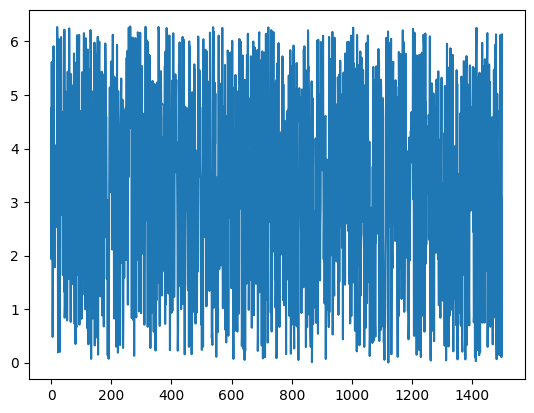

In [10]:
# 사인파 생성, random, seed
SAMPLES=1500

np.random.seed(786)
tf.random.set_seed(786)

x_value=np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
plt.plot(x_value)
plt.show()

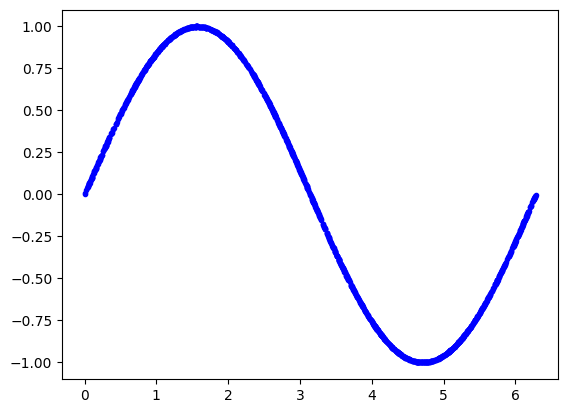

In [11]:
# x_value 통해서 y_value값 샘플
#np.random.shuffle(x_value)
y_value=np.sin(x_value)

plt.plot(x_value, y_value, 'b.')
plt.show()

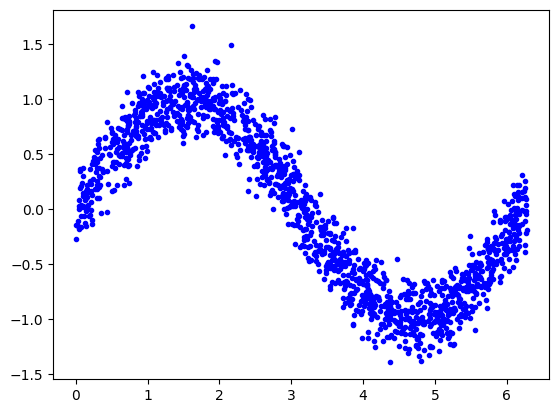

In [14]:
# 노이즈

y_value=y_value+0.1*np.random.randn(*y_value.shape)
plt.plot(x_value, y_value, 'b.')
plt.show()

900 300 300


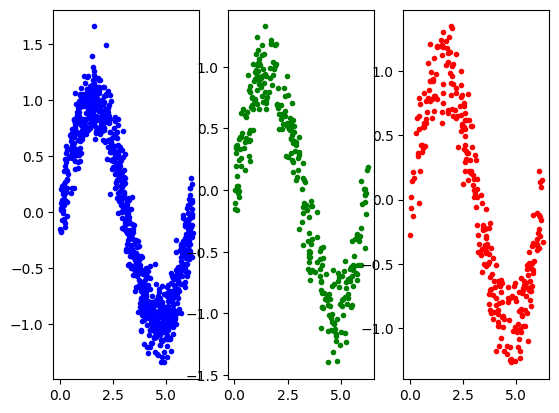

In [33]:
# teain 60%
# validation 20%
# test 20%

TRAIN_SPLIT=int(0.6*SAMPLES)
TEST_SPLIT=int(0.2*SAMPLES)
VALIDATION_SPLIT=int(0.2*SAMPLES)

x_train, x_test, x_validation=np.split(x_value, [TRAIN_SPLIT,TRAIN_SPLIT+TEST_SPLIT])
y_train, y_test, y_validation=np.split(y_value, [TRAIN_SPLIT,TRAIN_SPLIT+TEST_SPLIT])
print(len(x_train), len(x_test), len(x_validation))



fig=plt.figure()
ax1=fig.add_subplot(1,3,1)
plt.plot(x_train, y_train,'b.', label="Train")
ax2=fig.add_subplot(1,3,2)
plt.plot(x_validation, y_validation,'g.', label="validation")
ax3=fig.add_subplot(1,3,3)
plt.plot(x_test, y_test,'r.', label="Test")


In [ ]:
# 모델 생성, 컴파일
model=tf.keras.Sequential()